# Let's work with some forest fire data.

Quick import of the data and columns name creation.

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
#Read in the data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

#Create the columns
df.columns = ['X','Y','Month','Day','FFMC','DMC','DC','ISI','Temp','RH', 'Wind', 'Rain', 'Area']



    1. X - x-axis spatial coordinate
    2. Y - y-axis spatial coordinate
    3. month - month of the year
    4. day - day of the week: "mon" to "sun"
    5. FFMC - FFMC index from the FWI system
    6. DMC - DMC index from the FWI system
    7. DC - DC index from the FWI system
    8. ISI - ISI index from the FWI system
    9. temp - temperature in Celsius degrees
    10. RH - relative humidity in %
    11. wind - wind speed in km/h
    12. rain - outside rain in mm/m2
    13. area - the burned area of the forest (in ha)
    
For more information about the Fire Weather Index (FWI) please visit [here](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)

This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 


# Descriptive statistics

### 1) Show an overview of the data, speciafically show the data type and the number of non-null values in each column. Also show the mean, std and quantiles of the Area column. What do the quantiles tell you about the burn area of forest fires ?

In [252]:
# Displaying the data type, the number of non_null values in each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   Month   517 non-null    object 
 3   Day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   Temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  Wind    517 non-null    float64
 11  Rain    517 non-null    float64
 12  Area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [253]:
# Displaying the Mean, STD quantiles of the area column
df['Area'].describe()

# The quartiels tell me that the data is skewed to the Right

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: Area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

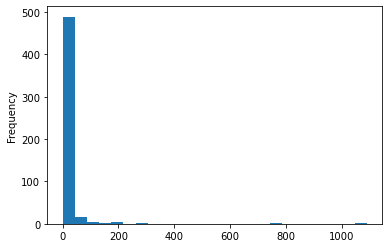

In [254]:
df['Area'].plot.hist(bins=25)

C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


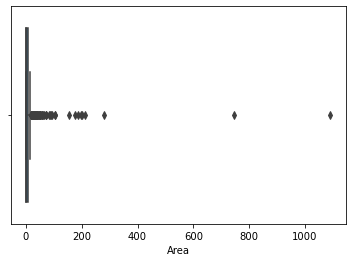

In [255]:
sns.boxplot(df['Area'])
plt.show()

##### What do the quantiles tell me about the burn area of forest fires? 
The quartiels tell me that the data is skewed to the Right. <br>
At least when looking at the data originally. It also tells use that 25% of fires contain 0 hectare. <br>
 And that 75% are below 6.57 hectare <br>

C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


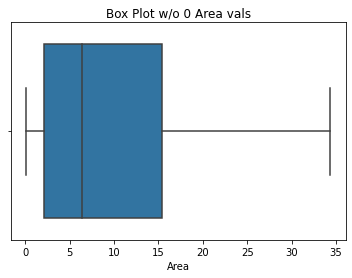

In [256]:
df_less_0 = df[df['Area'] > 0].copy()
sns.boxplot(df_less_0['Area'],showfliers=False)
plt.title("Box Plot w/o 0 Area vals")
plt.show()

When we remover the forest fires that have 0 burn area... which makes more sense... 
The interquartile range is inbetween 2 and 16 hectare. Meaning that the lowest 25 percent of 
the fires are below 2 hectare and the largest 75 percent of fires is above 16 hectare. With 50% of fire area being inbetween 2 and 16 hectare. 
Exlcuding the outliers, which a few of which are displayed in the graph above this one. The Maximum range of around 34 area units.

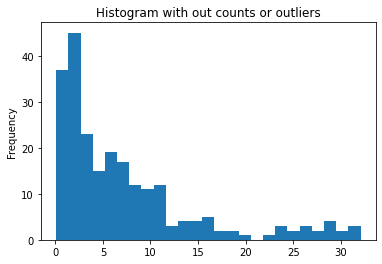

In [257]:
df_less_0[df_less_0['Area'] <= 34]['Area'].plot.hist(bins=25)
plt.title("Histogram with out counts or outliers")
plt.show()

Removing the outliers and zero values we still see a steep skew to the right. With 75% of fires remaing relatively below 15 area units.

### 2) Show the 5 months that have the largest burn area of the forest on average. Based on the result, is the park in the northern or southern hemisphere ?

There is not much going on in way of  months that consitute a fire in the north and south hemisphere. That is too wide broad of a range <br>
The Typical fire season in Autralia (Southern) is December through May. <br> 
Typical fire season in Colorado (Northern) is May through September. <br>
Typical fire season in Brazil (Southern) is July through Novemeber <br>
With that being said. We'll pretend that the typical fire season for the north hemisphere is May - Sept.


In [258]:

# Displaying the 5 months that have the largest burn area of the forrest on average
df.groupby(['Month'])['Area'].mean().to_frame().sort_values('Area', ascending=False).head(5)

,Area
Month,
may,19.240000
sep,17.942616
jul,14.369687
dec,13.330000
aug,12.489076


Looking at the original data with the zero values included. It seems to be a mix of months. <br>
I would say it looks like 4/5 are in my northern hemispher fire season description

In [259]:

# Displaying the 5 months that have the largest burn area of the forrest on average. Less the zero values.
df_less_0.groupby(['Month'])['Area'].mean().to_frame().sort_values('Area', ascending=False).head(5)

,Area
Month,
may,38.480000
sep,31.815773
jul,25.546111
aug,23.212020
apr,20.005000


The 5 months that have the largest burn average. Indicate that this park is in the northern hemisphere. <br>
The top five months that have the largest average are may, sept, jul, aug, apr.  <br>
4/5 occur during the northern hemispher fire season

In [260]:
df_less_0[df_less_0['Area'] <= 34].groupby(['Month'])['Area'].mean().to_frame().sort_values('Area', ascending=False).head(5)


,Area
Month,
dec,13.330000
oct,12.550000
mar,11.022778
feb,8.191111
sep,7.989136


However. If we remove the outliers, and burn area that is 0. <br>
We ended up with the 5 largest average fire months that correspond with the Austrailian Fire season. <br>
I still believe the park is in the Northern Hemisphere and the the outliers should not be removed when analyizing this question. <br>


### Show the number of data points available for each month in the data set. Knowing that data points are collected when there is a fire, does it support your answer ?

In [261]:
df.groupby(['Month']).count()['Area'].sort_values(ascending=False).to_frame()


,Area
Month,
aug,184
sep,172
mar,54
jul,32
feb,20
jun,17
oct,15
apr,9
dec,9


Knowing the data points are collected when there is a fire does support my answer. <br>
The highest counts are by far in aug and september which where in my defined fire season for Northern Hemisphere.


In [262]:
df_less_0.groupby(['Month']).count()['Area'].sort_values(ascending=False).to_frame()

,Area
Month,
aug,99
sep,97
mar,19
jul,18
feb,10
dec,9
jun,8
oct,5
apr,4


Removing the values that are marked as 0 hectare for burn area further drives home the point that this looks to be a northern hemespher park.

### 3) Create two summary statistics tables : 
#### -The first table use : Area, Rain, Relative Humidity (RH), Temperature and Wind. 
#### -The second use : Area, FFMC, DMC, DC and ISI

#### Calculate the total, average and standard deviation for 'Area' and calculate the average for everthing else.

#### Map the months of the year to their numerical representation so that the data will be shown chronologically for the year, rathern than ordered alphabetically on the months

In [263]:
# Creatind DF1 for Area, Rain, Relative Humidity (RH), Temperature and Wind. 
# Listing the descriptive states for this dataframe
df_stat1 = df[['Area', 'Rain', 'RH', 'Temp', 'Wind']].copy()
df_stat1.describe()


,Area,Rain,RH,Temp,Wind
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,12.847292,0.021663,44.288201,18.889168,4.017602
std,63.655818,0.295959,16.317469,5.806625,1.791653
min,0.000000,0.000000,15.000000,2.200000,0.400000
25%,0.000000,0.000000,33.000000,15.500000,2.700000
50%,0.520000,0.000000,42.000000,19.300000,4.000000
75%,6.570000,0.000000,53.000000,22.800000,4.900000
max,1090.840000,6.400000,100.000000,33.300000,9.400000


In [264]:
# Creating DF2 for Area, FFMC, DMC, DC and ISI
# Listing the descriptive states for this dataframe
df_stat2 = df[['Area', 'FFMC', 'DMC', 'DC', 'ISI']].copy()
df_stat2.describe()

,Area,FFMC,DMC,DC,ISI
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,12.847292,90.644681,110.872340,547.940039,9.021663
std,63.655818,5.520111,64.046482,248.066192,4.559477
min,0.000000,18.700000,1.100000,7.900000,0.000000
25%,0.000000,90.200000,68.600000,437.700000,6.500000
50%,0.520000,91.600000,108.300000,664.200000,8.400000
75%,6.570000,92.900000,142.400000,713.900000,10.800000
max,1090.840000,96.200000,291.300000,860.600000,56.100000


In [265]:
# Mapping months on the DF to numerical value then sorting
df['Month'] = pd.to_datetime(df.Month, format='%b').dt.month
df.sort_values('Month', inplace=True)
df


,X,Y,Month,Day,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
104,2,4,1,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
379,4,5,1,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
96,3,4,2,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
59,2,2,2,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
202,7,4,2,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,12,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
281,6,5,12,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77
273,4,6,12,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
279,4,4,12,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77


### 4) Which of the columns seem to correlate best with the area of burned forest ? Why ?

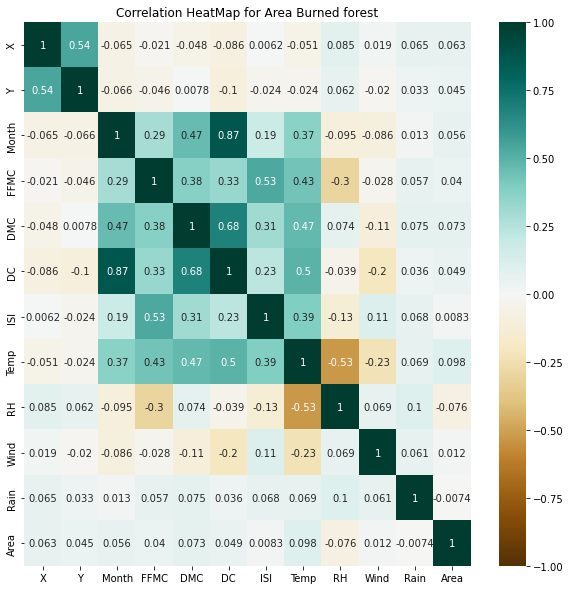

In [266]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title("Correlation HeatMap for Area Burned forest")
plt.plot()
plt.show()


Relative Humidity has the highest negative correlation with the area of the burned forest. <br>
When things are more dry they are more likely to burn. When things are wet they tend not to burn <br>
The highest positive correlation is with TEMP. Things tend to be more dry when the temperature is higher  <br>
To take another look at this question we will look at the correlation values when the area does not equal zero. <br>
This happens to produce the same results.

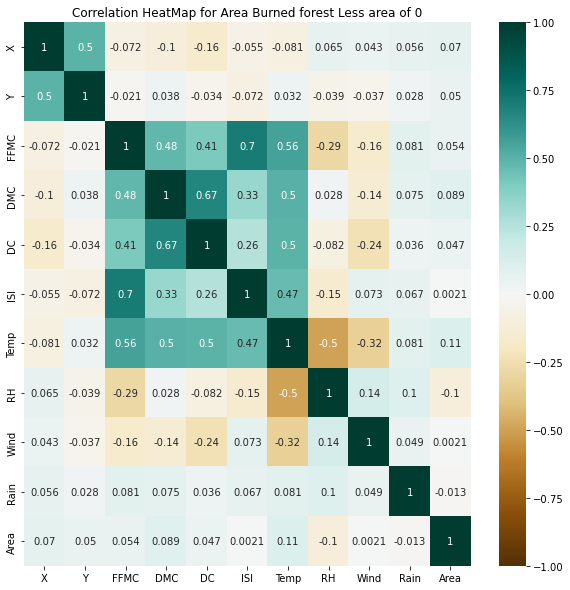

In [267]:
plt.figure(figsize=(10,10))
sns.heatmap(df_less_0.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title("Correlation HeatMap for Area Burned forest Less area of 0")
plt.plot()
plt.show()



# Visualization

### 5) Visualize the Area burnt by month

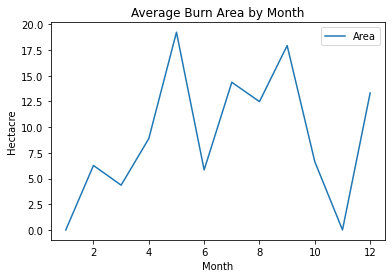

In [268]:
df1 = df.groupby(['Month'])['Area'].mean().to_frame().sort_values('Month', ascending=False).copy()
df1.plot()
plt.title('Average Burn Area by Month')
plt.ylabel("Hectacre")
plt.show()

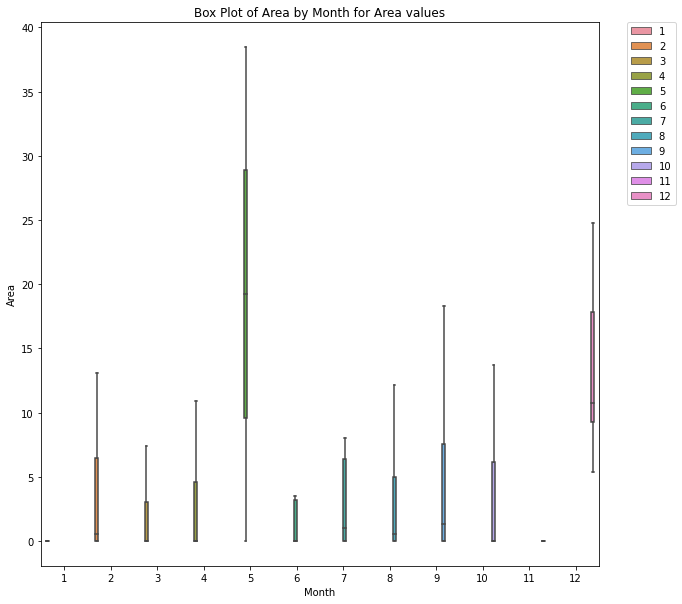

In [269]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Month", y="Area", data=df, hue="Month", showfliers=False)
plt.title("Box Plot of Area by Month for Area values")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

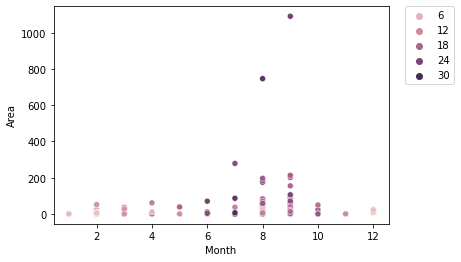

In [270]:
# Making a Scatter plot to look at the burn area by month
sns.scatterplot(data=df, x="Month", y="Area", hue="Temp", x_jitter=True)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

The plot that you obtained is most likely underwhelming.... Most data points are squished near the value 0 for Area. To fix this, we must change the scale of the values in the Area column and we'll be using a logarithmic scale. 

Before you apply the logarithmic scale you will need to add a value of 1 to the Area column (this will avoid creating -inf values since the log function has a vertical asymptote at 0). You will also need apply() and the numpy log function.

Once you have rescaled the Area data, please replot the same graph you did above and you should have a better 'spread of your data.

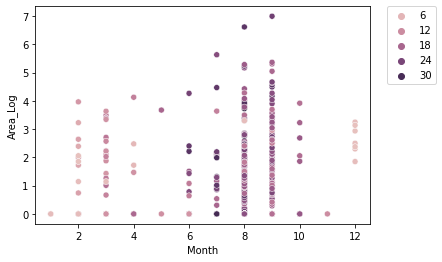

In [271]:
# Adding 1 to the Area Column and Labeling it Area Log
df['Area_Log'] = df['Area']+1

# Creating a lod of the Area Log
df['Area_Log'] = np.log(df['Area_Log'])

# Displaying a graph of thte logs
sns.scatterplot(data=df, x='Month', y='Area_Log',hue="Temp")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

### 6) Show the histogram of the Area variable. How does this histogram support your answer relating to the quantiles ?

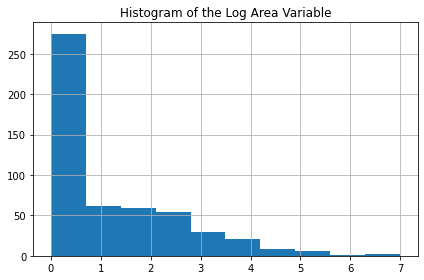

In [272]:
df['Area_Log'].hist()
plt.title("Histogram of the Log Area Variable")
plt.tight_layout()
plt.show()

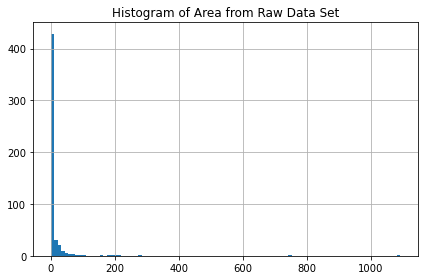

In [273]:
df['Area'].hist(bins=100)
plt.title("Histogram of Area from Raw Data Set")
plt.tight_layout()
plt.show()

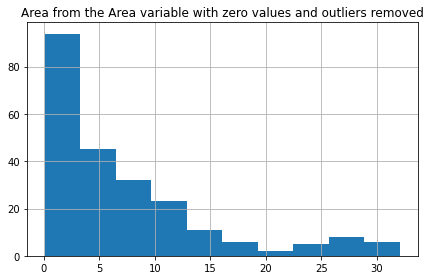

In [274]:
df_less_0[df_less_0['Area'] <= 34]['Area'].hist()
plt.title("Area from the Area variable with zero values and outliers removed")
plt.tight_layout()

This graph helps show that the data is skewed to the right. <br>
Yes this graph does support my answer relating to the quantiels. <br>
75% of the fires are under 34 hectarces. All three graphs support this. <br>


### 7) Plot the relational plot between Area and the variables you chose in question 4. Comment on the relationship between the variables you chose and Area

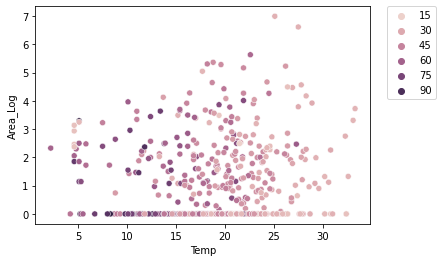

In [275]:
# Now to look at the graph with Temp and Rh as the factors for the fire
sns.scatterplot(data=df, x="Temp", y="Area_Log", hue="RH")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

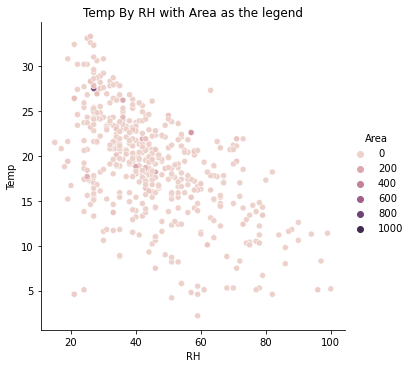

In [276]:
# Replot being the relational plot, but essentially the same as the scatter plot
sns.relplot(data=df, y="Temp", x="RH", hue="Area")
plt.title("Temp By RH with Area as the legend")
plt.show()

Text(0.5, 1.0, 'Temp by RH:  less 0 area values')

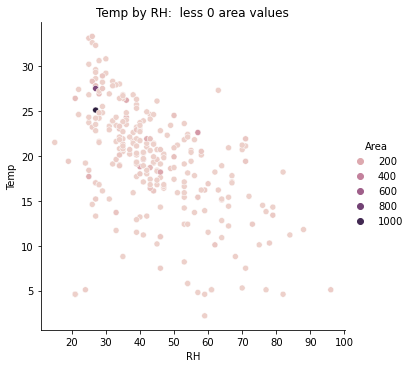

In [277]:
# Replot being the relational plot, but essentially the same as the scatter plot
sns.relplot(data=df_less_0, y="Temp", x="RH", hue="Area")
plt.title("Temp by RH:  less 0 area values")

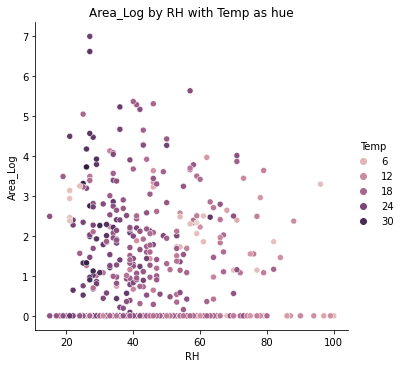

In [278]:
sns.relplot(data=df, y="Area_Log", x="RH", hue="Temp")
plt.title("Area_Log by RH with Temp as hue")
plt.show()


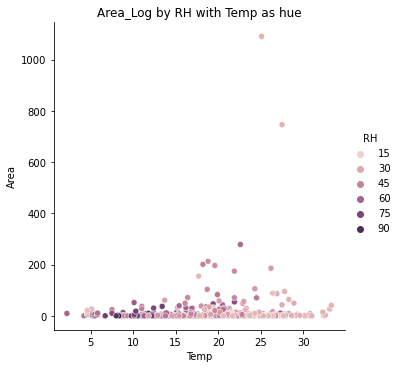

In [280]:
sns.relplot(data=df, y="Area", x="Temp", hue="RH")
plt.title("Area by Temp with RH as hue")
plt.show()
